
### Podstawy Reprezentacji i Analizy Danych
### Rok Akademicki 2018/2019
# Raport z projektu grupowego
# Zadanie: Czy dana osoba zarabia więcej niż 50k USD rocznie?
### Opracowanie: Łukasz Knigawka 291076, Grzegorz Kopyt 291078

Dokument stanowi podsumowanie przeprowadzonych badań. Numerowane sekcje odpowiadają numerom kolejnych kroków rozwiązania, przedstawionych w poleceniu.


### 1. Opis przedstawionego problemu

Celem zadania jest przeprowadzenie analizy danych i określenie, na podstawie szeregu informacji o danej osobie, czy osoba ta zarabia ponad 50 tysięcy dolarów rocznie. Predykcja kończy się więc przydzieleniem do jednej z 2 grup (>50 i =<50).

### 2. Wstępna analiza danych

Zaimportowano popularne pakiety.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Wczytano dane jako ramka pakietu pandas.

In [2]:
df = pd.read_csv('adult.csv')

W celu szybkiego "zorientowania się" w danych, wyswietlono pierwsze 10 rekordów.

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


Można od razu zauważyć, że przy braku wartości dla danej kategorycznej, posługiwano się znakiem zapytania.

Określono liczbę obiektów.

In [4]:
object_count = df.shape[0]
print("Liczba obiektów: " + str(object_count))

Liczba obiektów: 32561


Określono liczbę atrybutów.

In [5]:
attribute_count = df.shape[1]
print("Liczba atrybutów: " + str(attribute_count))

Liczba atrybutów: 15


Przedstawiono poniżej nazwy kolumn ramki. 

In [6]:
list(df.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

Kolumna 'age' przedstawia po prostu dokładny wiek osoby badanej. Inną oczywistą kolumną danych numerycznych jest 'hours.per.week', które zawiera informacje o liczbie godzin przepracowanych przez osobę w tygodniu. Mniej oczywista wydała się kolumna 'workclass', sprawdzono więc jakie unikalne wartości pojawiały się w tej kolumnie. Z rozpędu przebadano także inne kolumny.

Przanalizowano także możliwe wartości pojawiające się w kolumnach 'relationship', 'education', 'marital.status', 'occupation', 'race', 'sex', 'native.country'. Przy okazji przedstawiono liczbę unikalnych danych.

In [7]:
print("Wartości pojawiające się w kolumnie workclass: ")
print(df.workclass.unique())
print("Liczba unikalnych danych: " + str(df.workclass.nunique()))
print('\n')
print("Wartości pojawiające się w kolumnie education: ")
print(df.education.unique())
print("Liczba unikalnych danych: " + str(df.education.nunique()))
print('\n')
print("Wartości pojawiające się w kolumnie marital.status: ")
print(df['marital.status'].unique())
print("Liczba unikalnych danych: " + str(df['marital.status'].nunique()))
print('\n')
print("Wartości pojawiające się w kolumnie occupation: ")
print(df.occupation.unique())
print("Liczba unikalnych danych: " + str(df.occupation.nunique()))
print('\n')
print("Wartości pojawiające się w kolumnie relationship: ")
print(df.relationship.unique())
print("Liczba unikalnych danych: " + str(df.relationship.nunique()))
print('\n')
print("Wartości pojawiające się w kolumnie race: ")
print(df.race.unique())
print("Liczba unikalnych danych: " + str(df.race.nunique()))
print('\n')
print("Wartości pojawiające się w kolumnie sex: ")
print(df.sex.unique())
print("Liczba unikalnych danych: " + str(df.sex.nunique()))
print('\n')
print("Wartości pojawiające się w kolumnie native.country: ")
print(df['native.country'].unique())
print("Liczba unikalnych danych: " + str(df['native.country'].nunique()))

Wartości pojawiające się w kolumnie workclass: 
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Liczba unikalnych danych: 9


Wartości pojawiające się w kolumnie education: 
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Liczba unikalnych danych: 16


Wartości pojawiające się w kolumnie marital.status: 
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Liczba unikalnych danych: 7


Wartości pojawiające się w kolumnie occupation: 
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Liczba unikalnych danych: 15


Wartości pojawiające się w kolumn

Możemy zaobserwować, iż krajów pochodzenia omawianych osób jest, wyrażając się kolokwialnie i niekonkretnie, sporo. Sprawdźmy, jaki udział osób badanych to osoby pochodzące ze Stanów Zjednoczonych.

In [8]:
native_country_counts = df['native.country'].value_counts()
print(native_country_counts)

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Jak możemy łatwo zauważyć, badanie zostało z pewnością przeprowadzone w Stanach zjednoczonych. Ciekawą obserwacją może być zauważenie, iż co najmniej dwie wartości nie są do końca poprawne. Jedna z nich to 'Hong', i można podejrzewać, iż badany pochodził z Hongkongu. Druga podejrzana wartość to 'South', które nie wskazuje bezpośrednio na kraj. Może wywodzić się na przykład od 'South Korea', ale równie dobrze od 'South Africa'.

In [9]:
print("Udział badanych pochodzących z USA w liczbie wszystkich badanych wynosi: " + "{0:.2f}".format(native_country_counts[0] / object_count * 100) + "%")

Udział badanych pochodzących z USA w liczbie wszystkich badanych wynosi: 89.59%


Największą zagadką wśród nazw kolumn okazała się 'fnlwgt'. Jest to skrót od 'final weight'. Z tego co udało się wywnioskować na podstawie opisu zadania, wskaźnik ten odpowiada liczbie ludzi, którą według Census Buerau reprezentuje dany obiekt. Na późniejszym etapie sprawdzono, czy występują korelacje z tym wskaźnikiem. 

Określono zakres zmienności atrybutów. Aby znaleźć zakres zmienności atrybutów numerycznych, znaleziono wartości skrajne -- minimum i maksimum.

In [10]:
print("Najniższy wiek osoby badanej: " + str(df.age.min()))
print("Najwyższy wiek osoby badanej: " + str(df.age.max()))
print("\n")
print("Najniższa wartość atrybutu education.num: " + str(df['education.num'].min()))
print("Najwyższa wartość atrybutu education.num: " + str(df['education.num'].max()))
print("\n")
print("Najniższa wartość atrybutu capital.gain: " + str(df['capital.gain'].min()))
print("Najwyższa wartość atrybutu capital.gain: " + str(df['capital.gain'].max()))
print("\n")
print("Najniższa wartość atrybutu capital.loss: " + str(df['capital.loss'].min()))
print("Najwyższa wartość atrybutu capital.loss: " + str(df['capital.loss'].max()))
print("\n")
print("Najniższa wartość atrybutu hours.per.week: " + str(df['hours.per.week'].min()))
print("Najwyższa wartość atrybutu hours.per.week: " + str(df['hours.per.week'].max()))
print("\n")

Najniższy wiek osoby badanej: 17
Najwyższy wiek osoby badanej: 90


Najniższa wartość atrybutu education.num: 1
Najwyższa wartość atrybutu education.num: 16


Najniższa wartość atrybutu capital.gain: 0
Najwyższa wartość atrybutu capital.gain: 99999


Najniższa wartość atrybutu capital.loss: 0
Najwyższa wartość atrybutu capital.loss: 4356


Najniższa wartość atrybutu hours.per.week: 1
Najwyższa wartość atrybutu hours.per.week: 99




Określono wartości statystyczne atrybutów. Zawarto tu oczywiście także dane uzyskane przed chwilą w inny sposób.

In [11]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Można więc szybko dokonać obserwacji, iż dla zdecydowanej większości badanych obiektów, parametry 'capital.gain' oraz 'capital.loss' przyjmują wartość 0. W pierwszej chwili zagadkowy wydał się także parametr 'education.num'. Dane numeryczne nie zostały opisane w deskrypcji problemu. Padło przypuszczenie, iż wskaźnik ten mógłby odpowiadać liczbie lat poświęconych na edukację. W Stanach Zjednoczonych same primary i secondary school trwają obecnie razem 12 lat, a dalej czas na wyższą edukację. W związku z tym, iż najwyższa wartość w tej kolumnie wyniosła 16, można raczej odrzucić taką hipotezę. 

Poniższe działania przeprowadzono, aby określić poziom wypełnienia kolumn.

Sprawdzono liczbę danych z wartością 'nan' (null).

In [12]:
nans_in_rows = df.isnull().sum(axis=1).sum()
print("Liczba wartości nan: " + str(nans_in_rows))

Liczba wartości nan: 0


Jak można też wnioskować na podstawie wyświetlonych pierwszych dziesięciu rekordów, w ten sposób nie oznaczano brakujących danych. Sprawdzenie poziomu wypełnienia kolumn sprowadza się więc do sprawdzenia liczby występujących znaków zapytania. Sprawdzono ich liczbę w poszczególnych kolumnach.

W pierwszej kolejności sprawdzono liczbę znaków zapytania w kolumnach danych numerycznych.

In [13]:
question_marks_in_numerical_columns = len(df[df['age'] == '?']) + len(df[df['education.num'] == '?']) + len(df[df['fnlwgt'] == '?']) + len(df[df['capital.gain'] == '?']) + len(df[df['capital.loss'] == '?']) + len(df[df['hours.per.week'] == '?'])
print("Liczba znaków zapytania w kolumnach danych numerycznych: " + str(question_marks_in_numerical_columns))

Liczba znaków zapytania w kolumnach danych numerycznych: 0


/home/knigawkl/Desktop/rozpoznawanie-odciskow-palcow/rozpoznawanie-odciskow-palcow/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Nie znaleziono danych numerycznych o wartości '?'. Zdecydowanie ważniejsze są przy tym badaniu dane kategoryczne. Sprawdzono więc kolejne kolumny.

In [14]:
question_marks_in_workclass_column = len(df[df['workclass'] == '?'])
print("Liczba znaków zapytania w kolumnie workclass: " + str(question_marks_in_workclass_column))

Liczba znaków zapytania w kolumnie workclass: 1836


W kolumnie workclass znaleziono aż 1836 takich przykładów. 

In [15]:
print("Liczba obiektów o jasno określonym atrybucie workclass: " + str(object_count - question_marks_in_workclass_column))
print("Udział procentowy brakujących danych w kolumnie workclass: " + "{0:.2f}".format(question_marks_in_workclass_column / object_count * 100) + "%") 

Liczba obiektów o jasno określonym atrybucie workclass: 30725
Udział procentowy brakujących danych w kolumnie workclass: 5.64%


Okazuje się, że około co dwudziesty badany nie dzieli się informacją o 'workclass'. Następnie przeanalizowano pozostałe atrybuty kategoryczne, według tego samego schematu.

In [16]:
question_marks_in_education_column = len(df[df['education'] == '?'])
print("Liczba znaków zapytania w kolumnie education: " + str(question_marks_in_education_column))
print("Liczba obiektów o jasno określonym atrybucie education: " + str(object_count - question_marks_in_education_column))
print("Udział procentowy brakujących danych w kolumnie education: " + "{0:.2f}".format(question_marks_in_education_column / object_count * 100) + "%") 

Liczba znaków zapytania w kolumnie education: 0
Liczba obiektów o jasno określonym atrybucie education: 32561
Udział procentowy brakujących danych w kolumnie education: 0.00%


In [17]:
question_marks_in_marital_status_column = len(df[df['marital.status'] == '?'])
print("Liczba znaków zapytania w kolumnie marital.status: " + str(question_marks_in_marital_status_column))
print("Liczba obiektów o jasno określonym atrybucie marital.status: " + str(object_count - question_marks_in_marital_status_column))
print("Udział procentowy brakujących danych w kolumnie marital.status: " + "{0:.2f}".format(question_marks_in_marital_status_column / object_count * 100) + "%") 

Liczba znaków zapytania w kolumnie marital.status: 0
Liczba obiektów o jasno określonym atrybucie marital.status: 32561
Udział procentowy brakujących danych w kolumnie marital.status: 0.00%


In [18]:
question_marks_in_occupation_column = len(df[df['occupation'] == '?'])
print("Liczba znaków zapytania w kolumnie occupation: " + str(question_marks_in_occupation_column))
print("Liczba obiektów o jasno określonym atrybucie occupation: " + str(object_count - question_marks_in_occupation_column))
print("Udział procentowy brakujących danych w kolumnie occupation: " + "{0:.2f}".format(question_marks_in_occupation_column / object_count * 100) + "%") 

Liczba znaków zapytania w kolumnie occupation: 1843
Liczba obiektów o jasno określonym atrybucie occupation: 30718
Udział procentowy brakujących danych w kolumnie occupation: 5.66%


In [19]:
question_marks_in_relationship_column = len(df[df['relationship'] == '?'])
print("Liczba znaków zapytania w kolumnie relationship: " + str(question_marks_in_relationship_column))
print("Liczba obiektów o jasno określonym atrybucie relationship: " + str(object_count - question_marks_in_relationship_column))
print("Udział procentowy brakujących danych w kolumnie relationship: " + "{0:.2f}".format(question_marks_in_relationship_column / object_count * 100) + "%") 

Liczba znaków zapytania w kolumnie relationship: 0
Liczba obiektów o jasno określonym atrybucie relationship: 32561
Udział procentowy brakujących danych w kolumnie relationship: 0.00%


In [20]:
question_marks_in_race_column = len(df[df['race'] == '?'])
print("Liczba znaków zapytania w kolumnie race: " + str(question_marks_in_race_column))
print("Liczba obiektów o jasno określonym atrybucie race: " + str(object_count - question_marks_in_race_column))
print("Udział procentowy brakujących danych w kolumnie race: " + "{0:.2f}".format(question_marks_in_race_column / object_count * 100) + "%") 

Liczba znaków zapytania w kolumnie race: 0
Liczba obiektów o jasno określonym atrybucie race: 32561
Udział procentowy brakujących danych w kolumnie race: 0.00%


In [21]:
question_marks_in_native_country_column = len(df[df['native.country'] == '?'])
print("Liczba znaków zapytania w kolumnie native.country: " + str(question_marks_in_native_country_column))
print("Liczba obiektów o jasno określonym atrybucie native.country: " + str(object_count - question_marks_in_native_country_column))
print("Udział procentowy brakujących danych w kolumnie native.country: " + "{0:.2f}".format(question_marks_in_native_country_column / object_count * 100) + "%") 

Liczba znaków zapytania w kolumnie native.country: 583
Liczba obiektów o jasno określonym atrybucie native.country: 31978
Udział procentowy brakujących danych w kolumnie native.country: 1.79%


Brakujące dane występują więc w kolumnach workclass (5,64%), occupation (5,66%) oraz native.country (1,79%).

### 3. Analiza korelacji między zmiennymi

W pierwszej kolejności wyznaczono macierz korelacji, a następnie przedstawiono wynik na mapie ciepła.

Ze względu na osobiste preferencje, zmieniono nazwę kolumny 'income' na 'income>50k', i poprzez proste operacje uczyniono edytowaną kolumnę kolumną wartości logicznych.

In [22]:
df = df.rename(columns={'income':'income>50k'})
df = df.replace('<=50K', False)
df = df.replace('>50K', True)
df.head(8)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50k
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,False
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,False
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,False
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,False
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,False
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,False
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,False
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,True


Poniżej zastosowano współczynnik Pearsona.

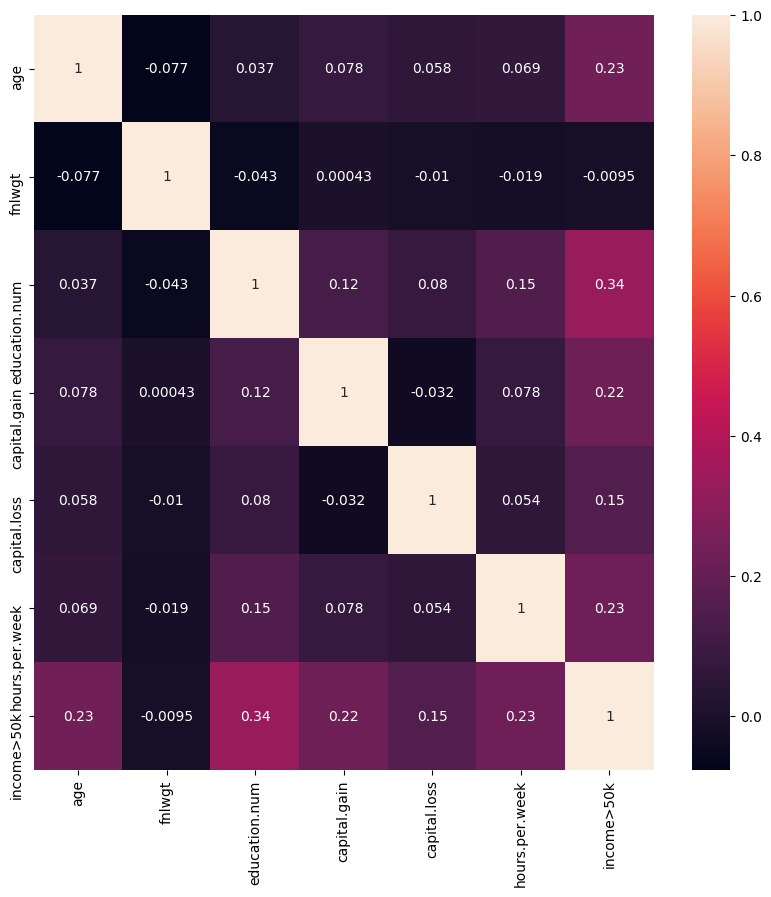

In [23]:
plt.figure(figsize=(10,10),dpi = 100)
cor = df.corr(method='pearson')
sns.heatmap(cor, annot=cor)

Z takiej mapy ciepła ciężko wysunąć głębokie wnioski. Korelacje pomiędzy danymi numerycznymi nie są zbyt silne. Współczynnik korelacji dla zagadkowego parametru 'fnlwgt' przyjął wartości bardzo bliskie zera, co pozwala utwiierdzić się w przekonaniu, iż parametr ten można będzie pominąć przy dalszej analizie zadania. Z perspektywy przeprowadzanych badań, najważniejsze są dla nas oczywiście korelacje z atrybutem 'income>50k'.

Poniżej, dla porównania, mapa ciepła dla współczynnika Kendalla.

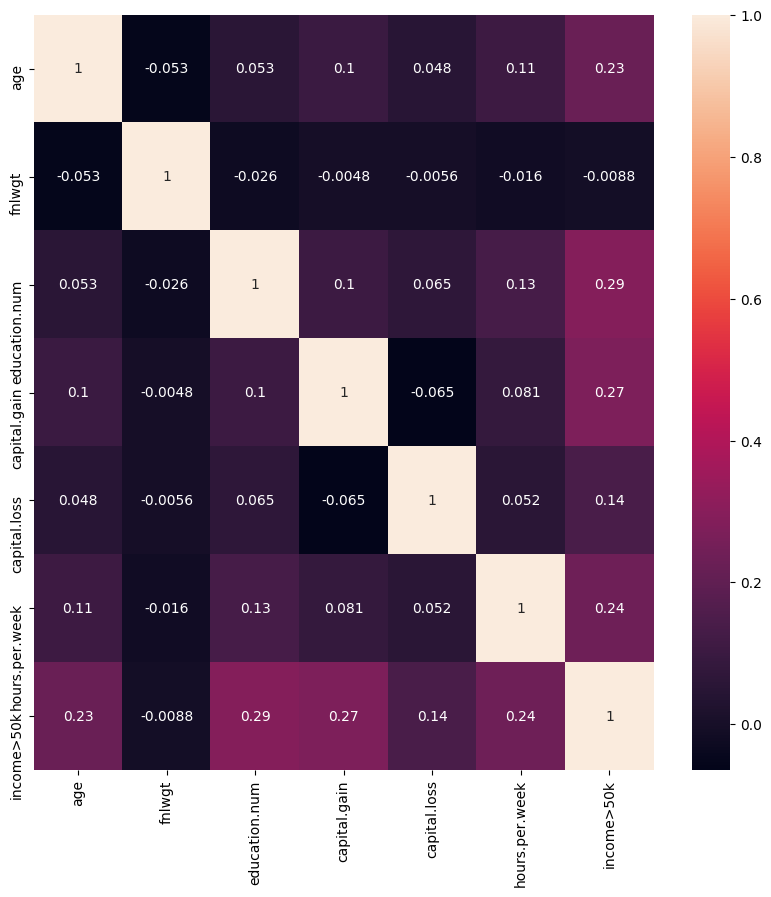

In [24]:
plt.figure(figsize=(10,10),dpi = 100)
cor = df.corr(method='kendall')
sns.heatmap(cor, annot=cor)

Otrzymano oczywiście bardzo podobne wyniki. Sprawdzono jeszcze wyniki dla współczynnika Spearmana.

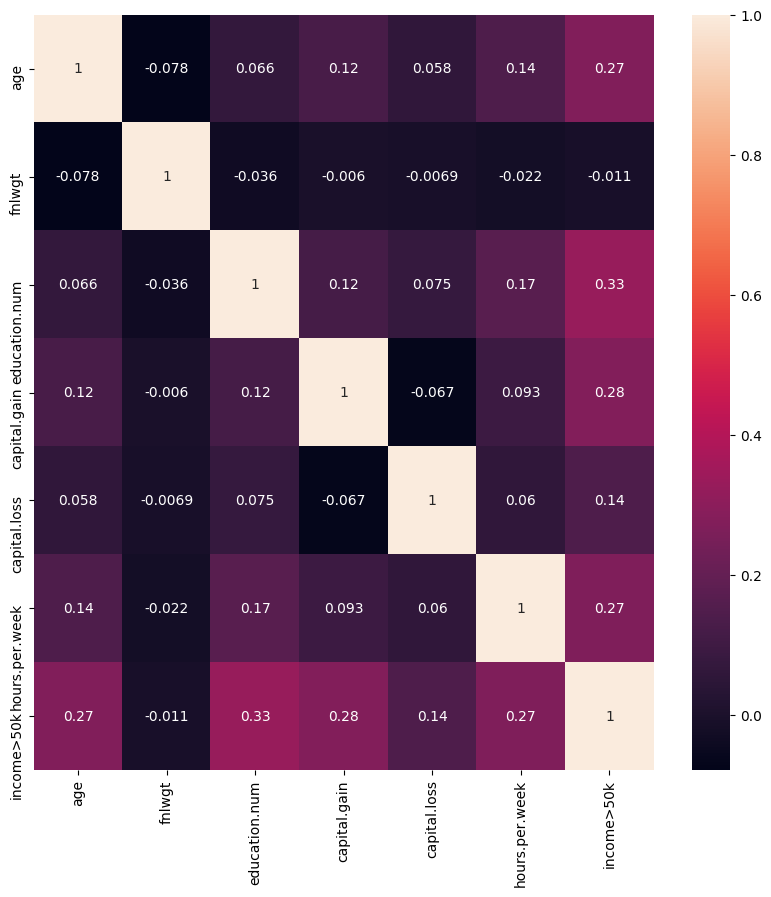

In [25]:
plt.figure(figsize=(10,10),dpi = 100)
cor = df.corr(method='spearman')
sns.heatmap(cor, annot=cor)

Bez względu na zastosowany współczynnik, korelacje atrybutów z atrybutem 'income>50k' są w większości słabo dodatnie. Logiczne wydaje się, że zazwyczaj wraz z wiekiem rosną zarobki; im więcej godzin w tygodniu osoba pracuje, tym więcej zarobi; więcej zarobi osoba bardziej wykształcona. 

W dalszej części raportu omówiono dalsze badania korelacji, dla zmodyfikowanych nieco danych.

### 4. Przygotowanie danych do analizy

W pierwszej kolejności postanowiono rozszyfrowań znaczenie kolumny 'education.num'. 

In [26]:
print("Liczba unikalnych wartości dla parametru education: " + str(df.education.nunique()))
print("Liczba unikalnych wartości dla parametru education.num: " + str(df['education.num'].nunique()))

Liczba unikalnych wartości dla parametru education: 16
Liczba unikalnych wartości dla parametru education.num: 16


Zauważono, iż unikalnych wartości tych dwóch kategorii występuje taka sama liczba. Po ręcznym przejrzeniu części z danych śmiało wysnuto obserwację, iż kolumna 'education.num' jest po prostu numeryczną reprezentacją wartości zadanych w kolumnie 'education'. Poniższe działania wykonano, wby potwierdzić przypuszczenia.

In [27]:
print("Dane kolumny education: ")
print(df['education'].value_counts())
print("Dane kolumny education.num: ")
print(df['education.num'].value_counts())

Dane kolumny education: 
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Dane kolumny education.num: 
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64


Jak widać, kolumny te przedstawiają dokładnie te same informacje, w nieco inny sposób. Im wyższy szczebel edukacji osoby badanej, tym wyższy wskaźnik 'education.num'. W związku z tym, iż zdecydowano się zostawić w tym przypadku dane numeryczne, ze zbioru danych usunięto kolumnę 'education'.

In [28]:
df = df.drop(['education'], axis=1)

Opisywany wcześniej parametr 'fnlwgt' uznano także za zupełnie niepotrzebny w dalszych operacjach. Pozbyto się go.

In [29]:
df = df.drop(['fnlwgt'], axis=1)

Parametry 'capital.loss' oraz 'capital.gain' nie zostały szczególnie opisane w zadaniu. Mimo szukania odpowiedzi na pytanie co właściwie one oznaczają w internecie, nie uzyskano pewnej odpowiedzi. Niemniej jednak, głównym powodem do pozbycia się także i tych kolumn z ramki danych był fakt, iż wartości statystyczne wskazywały na to, iż parametry te nie dotyczyły zupełnie większości osób badanych. Korelacja pomiędzy tymi danymi a faktem, czy dana osoba zarabiała pona 50k$ rocznie, jeśli w ogóle miała miejsce, była niewielka.

In [30]:
df = df.drop(['capital.gain', 'capital.loss'], axis=1)

Wyświetlono fragment zmodyfikowanej ramki danych.

In [31]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income>50k
0,90,?,9,Widowed,?,Not-in-family,White,Female,40,United-States,False
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,False
2,66,?,10,Widowed,?,Unmarried,Black,Female,40,United-States,False
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,False
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,False


W związku z tym, że prawie 90% badanych pochodziło ze Stanów Zjednoczonych, a reszta z nich to prawdopodobnie imigranci, zdecydowano się na podział ze względu na narodowości: USA i reszta świata. 

In [32]:
df = df.rename(columns={'native.country':'USA_native'})
df = df.replace('United-States', True)
df = df.replace(['Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan', 'India',
 'Philippines', 'Trinadad&Tobago', 'Canada', 'South', 'Holand-Netherlands',
 'Puerto-Rico', 'Poland', 'Iran', 'England', 'Germany', 'Italy', 'Japan', 'Hong',
 'Honduras', 'Cuba', 'Ireland', 'Cambodia', 'Peru', 'Nicaragua',
 'Dominican-Republic', 'Haiti', 'El-Salvador', 'Hungary', 'Columbia',
 'Guatemala', 'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
 'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'], False)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,USA_native,income>50k
0,90,?,9,Widowed,?,Not-in-family,White,Female,40,True,False
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,True,False
2,66,?,10,Widowed,?,Unmarried,Black,Female,40,True,False
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,True,False
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,40,True,False


Idąc za ciosem, w celu łatwiejszego przedstawienia danych w macierzy korelacji, atrybut 'sex' zmieniono na 'male' przyjmujące wartości True oraz False.

In [33]:
df = df.rename(columns={'sex':'male'})
df = df.replace('Male', True)
df = df.replace('Female', False)
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,male,hours.per.week,USA_native,income>50k
0,90,?,9,Widowed,?,Not-in-family,White,False,40,True,False
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,False,18,True,False
2,66,?,10,Widowed,?,Unmarried,Black,False,40,True,False
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,False,40,True,False
4,41,Private,10,Separated,Prof-specialty,Own-child,White,False,40,True,False


W tym momencie postanowiono znów sprawdzić jak wygląda mapa ciepła macierzy korelacji.

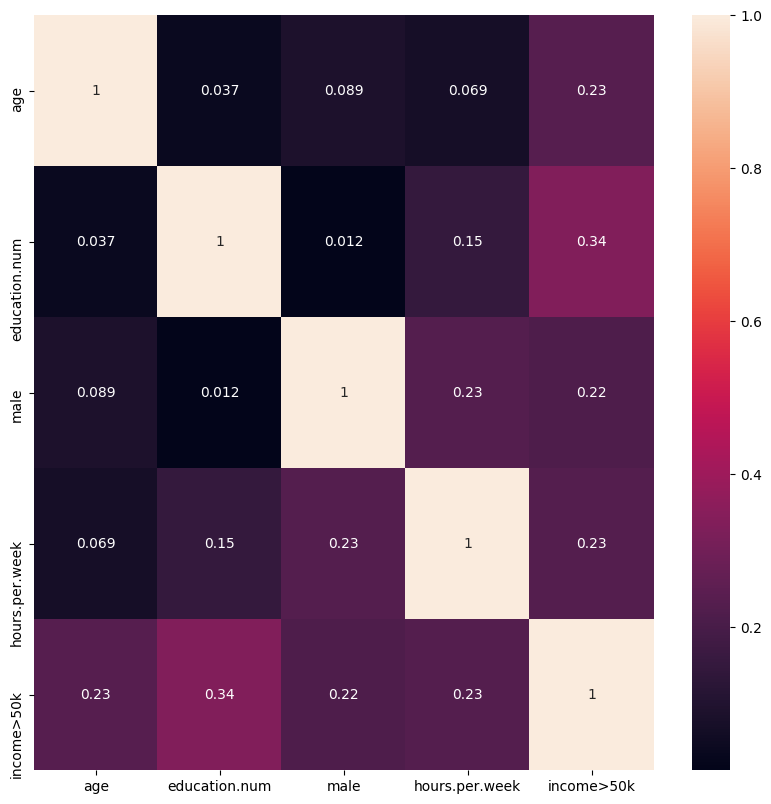

In [34]:
plt.figure(figsize=(10,10),dpi = 100)
cor = df.corr(method='pearson')
sns.heatmap(cor, annot=cor)

Nie da się ukryć, znalezione korelacje nie są zbyt mocne.

Pojawiające się wielokrotnie znaki zapytania nie są najwygodniejszym sposobem oznaczenia braku danych. Zmieniono więc braki na null, a następnie usunięto wiersze z brakami.

In [35]:
df = df.replace({'?': np.nan})
df = df.dropna()
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,male,hours.per.week,USA_native,income>50k
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,False,18,True,False
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,False,40,True,False
4,41,Private,10,Separated,Prof-specialty,Own-child,White,False,40,True,False
5,34,Private,9,Divorced,Other-service,Unmarried,White,False,45,True,False
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,True,40,True,False


Przy przeglądaniu danych wydawało się, iż zdecydowana większość badanych to przedstawiciele rasy białej. Sprawdźmy, jaki udział wśród ogółu badanych mieli białoskórzy obywatele.

In [36]:
df.race.describe()

count     30162
unique        5
top       White
freq      25933
Name: race, dtype: object

In [37]:
print("Liczba białoskórych badanych: " + "{0:.2f}".format(25933 / 30162 * 100) + "%")

Liczba białoskórych badanych: 85.98%


Mimo iż zdecydowana większość wierszy dotyczy ludzi o białej skórze, nie zdecydowano się w tym przypadku na żadne dalsze działania.

### 5. Analiza przy pomocy algorytmów grupowania

Zaimportowano niezbędne pakiety.

In [62]:
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

W celu przygotowania danych do przepuszczenia ich przez algorytm k najbliższych sąsiadów, podzielono ramkę na zestaw cech i atrybut decyzyjny.

In [52]:
features = df.drop("income>50k", axis=1)
target = df['income>50k']
features_to_encode = features[['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'male', 'USA_native']]
features_encoded = features_to_encode.apply(preprocessing.LabelEncoder().fit_transform)
target = preprocessing.LabelEncoder().fit_transform(target)
features[['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'male', 'USA_native']] = features_encoded
print("Wymiary macierzy cech: ")
print(features.shape, target.shape)
print("\n")
print("Przykładowe wiersze macierzy cech: ")
display(features.head(5))

Wymiary macierzy cech: 
(30162, 10) (30162,)


Przykładowe wiersze macierzy cech: 


,age,workclass,education.num,marital.status,occupation,relationship,race,male,hours.per.week,USA_native
1,82,2,9,6,3,1,4,0,18,1
3,54,2,4,0,6,4,4,0,40,1
4,41,2,10,5,9,3,4,0,40,1
5,34,2,9,0,7,4,4,0,45,1
6,38,2,6,5,0,4,4,1,40,1


In [55]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

In [58]:
#Analising the % importance level in each feature
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(features, target)
importances = forest.feature_importances_
feature_importances = pd.DataFrame(importances*100,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
display(feature_importances)

,importance
age,26.497045
education.num,16.821848
hours.per.week,14.639613
relationship,10.782358
occupation,10.772482
marital.status,8.623650
workclass,5.749342
male,3.422268
race,1.871362
USA_native,0.820032


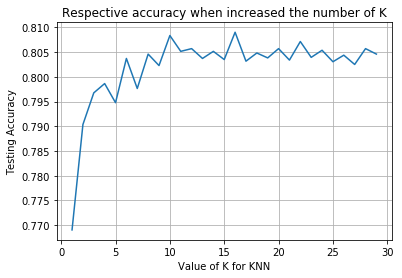

In [63]:
#Analisng the accuracy by increasing the number of K
scores = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

sns.lineplot(range(1,30), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Respective accuracy when increased the number of K")
plt.grid(True)
plt.show()

In [64]:
print("The best K value in this dataset is {0} - Accuracy = {1}".format(scores.index(max(scores)), max(scores)))

The best K value in this dataset is 15 - Accuracy = 0.8090396728920323


### 6. Test klasyfikatorów pod kątem doboru ich parametrów

### 7. Wnioski

## 